In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import folium as folium
import plotly.express as px
import seaborn as sns

geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
response = requests.get(geojson_url)
geojson = response.json()

states = {
    'Alfred State University':"NY", #'Alfred State University':
    'Johns Hopkins University':"MD", #Maryland
    'Chapman University':"CA", #California
    'University of New Hampshire':"NH", #NewHampshire
    'University of North Carolina':"NC",
    'Vanderbilt University':"TN", #Tennessee
    'University of Virginia':"VA", #Virginia
    'University of Texas':"TX", #Texas
    'Cornell University':"NY",
    'Butler University':"IN", #indiana
    'University of Illinois':"IL", #Illinois
    'University of Washington':"WA", #Washington
    'Penn State University':"PA", #Pennsylvania
    'University of Michigan':"MI", #Michigan
    'Northwestern University':"IL", #Illinois
    'University of Alabama':"AL",
    'James Madison University':"VA", #Virginia
    'Texas Christian University':"TX", #Texas
    'Texas A&M University':"TX",
    'University of Arkansas':"AR", #Arkansas
    'San Diego State University':"CA",
    'University of Colorado Boulder':"CO", #SouthPark
    'University of Notre Dame':"IN", #Indiana
    'University of Nebraska Omaha':"NE", #Nebrasca
    'University of Delaware':"DE", #Delaware
    'Florida Atlantic University':"CA",
    'University of Wisconsin Stevens Point':"WI", # wisconsin
    'University of California Riverside':"CA",
    'Louisiana State University':"LA", #Louisiana
    'Temple University':"PA",
    'High Point University':"NC", #NorthCarolina
    'Duke University':"NK",
    'University of California Irvine':"CA",
    'University of British Columbia':"IL",
    'Ohio University':"OH", #ohio
    'Wilfred Laurier University':"IL",
    'University of Southern California':"CA",
    'University of California, Los Angeles':"CA",
    'Iowa State University':"IA", #Iowa
    'University of California, Davis':"CA",
    'Missouri State University':"MO", #missouri
    'Rice University':"TX",
    'University of Tennessee':"TN",
    'University of Oregon':"OR",
    'Syracuse University':"NY",
    'University of Waterloo':"IL",
    'Texas State University':"TX",
    'Southern Illinois University Carbondale':"IL",
    'George Washington University':"WA",
    'University of Louisville':"KY",
    'Southern Methodist University':"TX",
    'University of Minnesota':"MN",
    'York University':"MN",
    'Santa Clara University':"CA",
    'Indiana University':"IN",
    'University of California, Berkeley':"CA",
    'University of Missouri':"MN",
    'Purdue University':"IN",
    'Appalachian State University':"NC",
    'Emory University':"GE", #georgia
    'University of Arizona':"AZ",
    'Truman State University':"MO",
    'University of Wisconsin-Madison':"WI",
    'Ohio State University':"OH",
    'Montgomery Blair High School':"MD",
    'San Marin High School':"CA",
    'Chaparral High School':"AZ",
    'Mountain Vista High School':"CO",
    'College of William and Mary':"VA",
    'Hillsdale College':"MI",
    'Smith College':"MA",
    'Dartmouth College':"NH",
    'Claremont McKenna College':"CA"
}
    


df = pd.read_csv('/Users/saba/Desktop/good_data.csv').drop(columns='Question')
df['Segment Description'] = df['Segment Description'].str.replace("is your age? ", "", regex=False)
geojson['features'][0]

{'type': 'Feature',
 'id': 'AL',
 'properties': {'name': 'Alabama'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-87.359296, 35.00118],
    [-85.606675, 34.984749],
    [-85.431413, 34.124869],
    [-85.184951, 32.859696],
    [-85.069935, 32.580372],
    [-84.960397, 32.421541],
    [-85.004212, 32.322956],
    [-84.889196, 32.262709],
    [-85.058981, 32.13674],
    [-85.053504, 32.01077],
    [-85.141136, 31.840985],
    [-85.042551, 31.539753],
    [-85.113751, 31.27686],
    [-85.004212, 31.003013],
    [-85.497137, 30.997536],
    [-87.600282, 30.997536],
    [-87.633143, 30.86609],
    [-87.408589, 30.674397],
    [-87.446927, 30.510088],
    [-87.37025, 30.427934],
    [-87.518128, 30.280057],
    [-87.655051, 30.247195],
    [-87.90699, 30.411504],
    [-87.934375, 30.657966],
    [-88.011052, 30.685351],
    [-88.10416, 30.499135],
    [-88.137022, 30.318396],
    [-88.394438, 30.367688],
    [-88.471115, 31.895754],
    [-88.241084, 33.796253],
    [-88.098683, 34.8

In [6]:
by_university = df[df['Segment Description'].str.contains('University', regex=False, na=False)].drop(columns=["Answer", "Percentage", "Segment Type"])
by_university['total'] = by_university.groupby(['Segment Description'])['Count'].transform('sum')
total_university = by_university.drop_duplicates(subset=['Segment Description'])
total_university = total_university.drop(columns=['Count'])
def get_region(state):
    return states[state]
total_university['id'] = total_university['Segment Description'].apply(get_region)
total_university['total'] = total_university['total'].astype('int')
total_university.head()
#Посчитать по штатам

,Segment Description,total,id
20,Alfred State University,1,NY
24,Johns Hopkins University,38,MD
28,Chapman University,1,CA
36,University of New Hampshire,2,NH
40,University of North Carolina,38,NC


In [7]:
legend = 'Activity of students by states(in votes per academy)'
map_data = total_university[['id', 'total']]

#black states will mean lack of knowledge about picnic

M = folium.Map(location=[34, -118], zoom_start=4)
folium.Choropleth(
    geo_data=geojson,
    data=map_data,
    columns=['id', 'total'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=legend
).add_to(M)
folium.LayerControl().add_to(M)
M

In [8]:
df = pd.read_csv('/Users/saba/Desktop/good_data.csv').drop(columns='Question').reset_index(drop = True)
df['Segment Description'] = df['Segment Description'].str.replace("is your age? ", "", regex=False)
print(df)

    Segment Type            Segment Description     Answer  Count  Percentage
0         Mobile             Mobile respondents  Instagram   2559       0.273
1         Mobile             Mobile respondents   Facebook   1182       0.126
2         Mobile             Mobile respondents   Snapchat   5423       0.579
3         Mobile             Mobile respondents   Linkedin    210       0.022
4            Web          Web-based respondents  Instagram     30       0.256
..           ...                            ...        ...    ...         ...
511       Custom  your parents make?  $50K-$90K   Linkedin      4       0.015
512       Custom             Mac or PC? Other 🐧  Instagram      5       0.217
513       Custom             Mac or PC? Other 🐧   Facebook      6       0.261
514       Custom             Mac or PC? Other 🐧   Snapchat     11       0.478
515       Custom             Mac or PC? Other 🐧   Linkedin      1       0.043

[516 rows x 5 columns]


           Count  Percentage
Answer                      
Instagram   2559       0.273
Facebook    1182       0.126
Snapchat    5423       0.579
Linkedin     210       0.022


<AxesSubplot: ylabel='Count'>

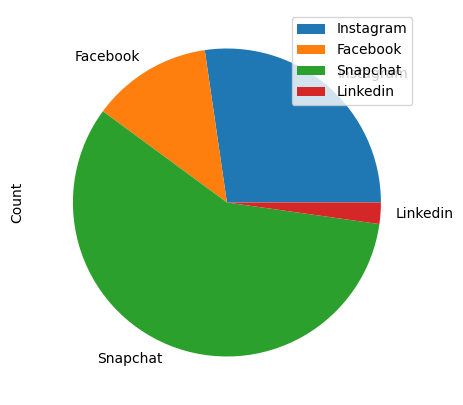

In [9]:
df_mobile = df[df['Segment Type'].str.contains('Mobile', regex=False, na=False)].drop(columns=['Segment Type', 'Segment Description']).set_index('Answer')
df_mobile.reset_index(drop = True)
print(df_mobile)
plot = df_mobile.plot.pie(y='Count', figsize=(5, 5))
plot

# representation of prefereble app on Mobile

           Count  Percentage
Answer                      
Instagram   2559       0.273
Facebook    1182       0.126
Snapchat    5423       0.579
Linkedin     210       0.022


<AxesSubplot: ylabel='Count'>

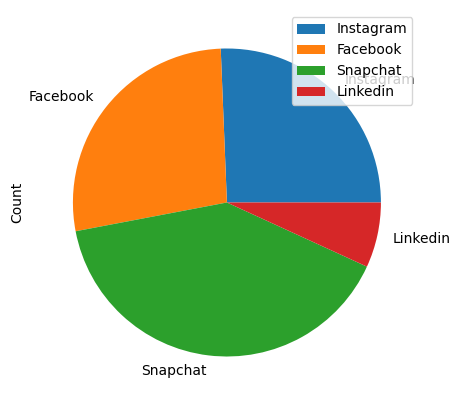

In [10]:
df_web = df[df['Segment Type'].str.contains('Web', regex=False, na=False)].drop(columns=['Segment Description']).set_index('Answer')
df_web.reset_index(drop = True)
print(df_mobile)
plot = df_web.plot.pie(y='Count', figsize=(5, 5))
plot

# representation of prefereble app on WEB


In [13]:
df = pd.read_csv('/Users/saba/Desktop/good_data.csv').drop(columns=['Question', 'Segment Type'])
df_liberals = df[df['Segment Description'].str.contains('Liberal')]
df_unknown = df[df['Segment Description'].str.contains('In-between')]
df_conserv = df[df['Segment Description'].str.contains('Conservative')]

,Segment Description,Answer,Count,Percentage
388,What's your leaning? In-between,Instagram,125,0.281
389,What's your leaning? In-between,Facebook,54,0.121
390,What's your leaning? In-between,Snapchat,253,0.569
391,What's your leaning? In-between,Linkedin,13,0.029


/Users/saba/Desktop/For_fun/env/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


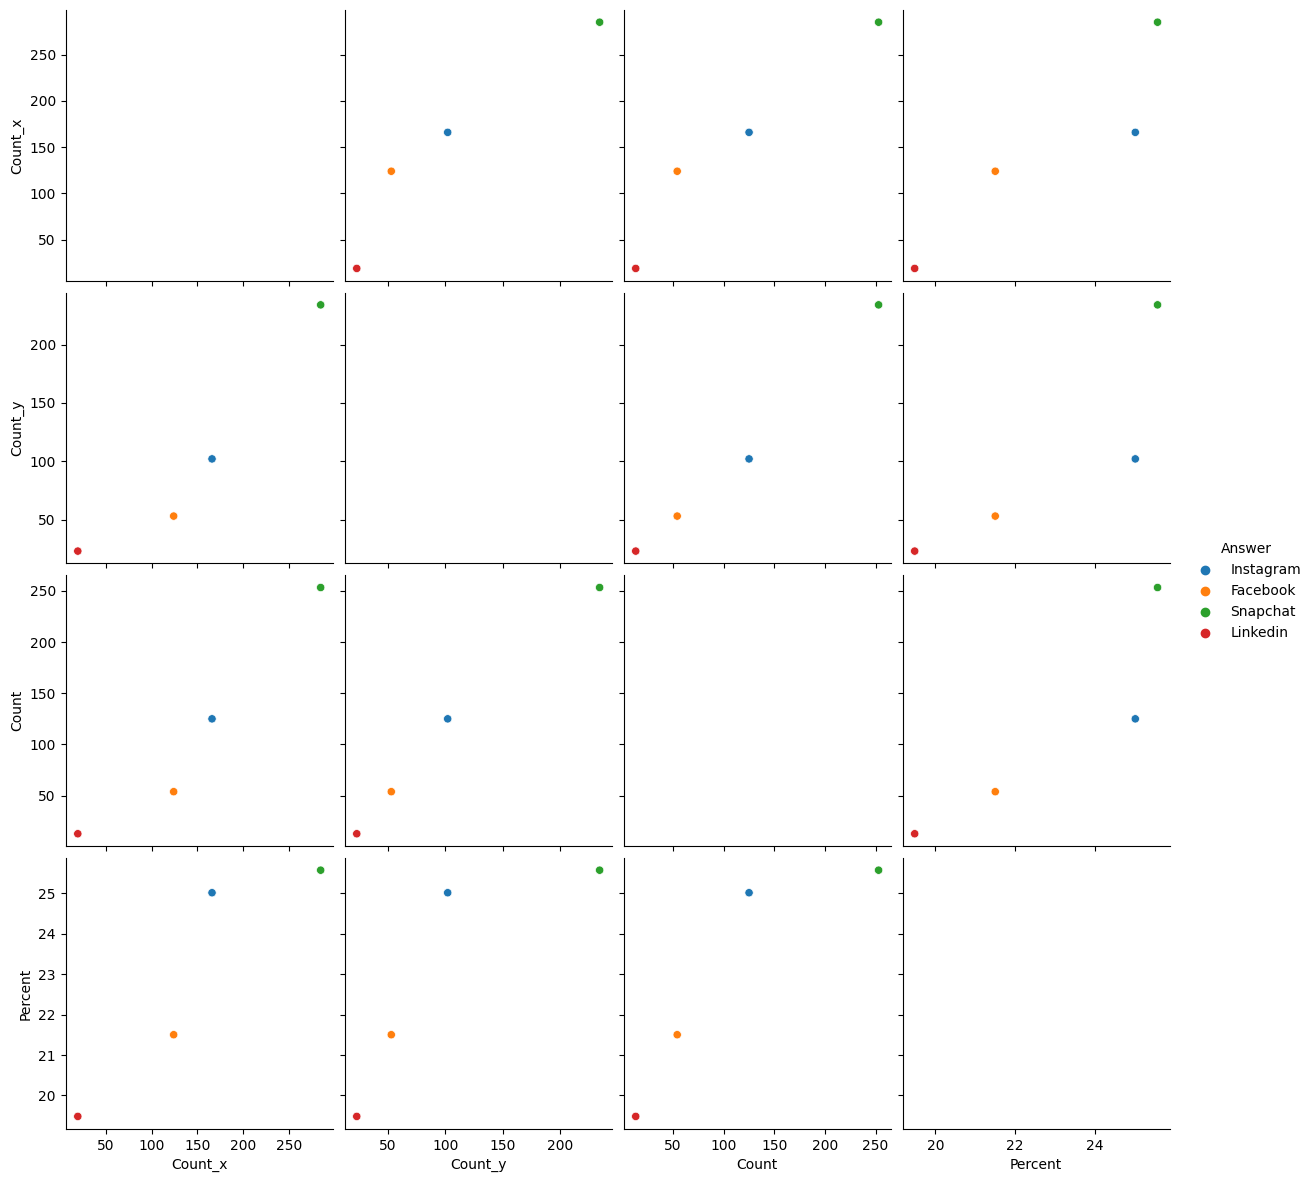

In [29]:
df_all = pd.merge(df_liberals, df_conserv, on='Answer')
df_all = pd.merge(df_all, df_unknown, on='Answer').drop(columns=['Percentage_y', 'Percentage', 'Percentage_x'])
df_all['Percent'] = 100* df['Count'] / df.groupby('Answer')['Count'].transform('sum')
sns.pairplot(df_all, hue='Answer', size=3)